In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\OJ 001\Desktop\DataScience\health_insurance_encoded_scaled3.csv")

In [4]:
print(df.columns)
df.shape

Index(['Customerid', 'Age', 'Bmi', 'Children', 'Annual_Income',
       'Claim_History', 'Annual_Premium', 'High_Cost_Claim',
       'Income_per_Child', 'Premium_to_Income_Ratio', 'Smoker_flag',
       'Is_Female', 'High_claim_history_flag', 'Is_Obese', 'Smoker_Obese',
       'Risk_Score_raw', 'Risk_Score', 'Log_Annual_Income',
       'Log_Annual_Premium', 'Age_by_Premium', 'Premium_per_Child',
       'Region_Northwest', 'Region_Southeast', 'Region_Southwest',
       'Bmi_Category_Obese', 'Bmi_Category_Overweight',
       'Bmi_Category_Underweight', 'Age_Group_Senior', 'Age_Group_Young',
       'Income_Bracket_Low', 'Income_Bracket_Medium'],
      dtype='object')


(1000, 31)

Train shape: (800, 29) (800,)
Test shape: (200, 29) (200,)
✅ Accuracy: 0.935

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       138
           1       0.92      0.87      0.89        62

    accuracy                           0.94       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.94      0.93       200


🔲 Confusion Matrix:
 [[133   5]
 [  8  54]]


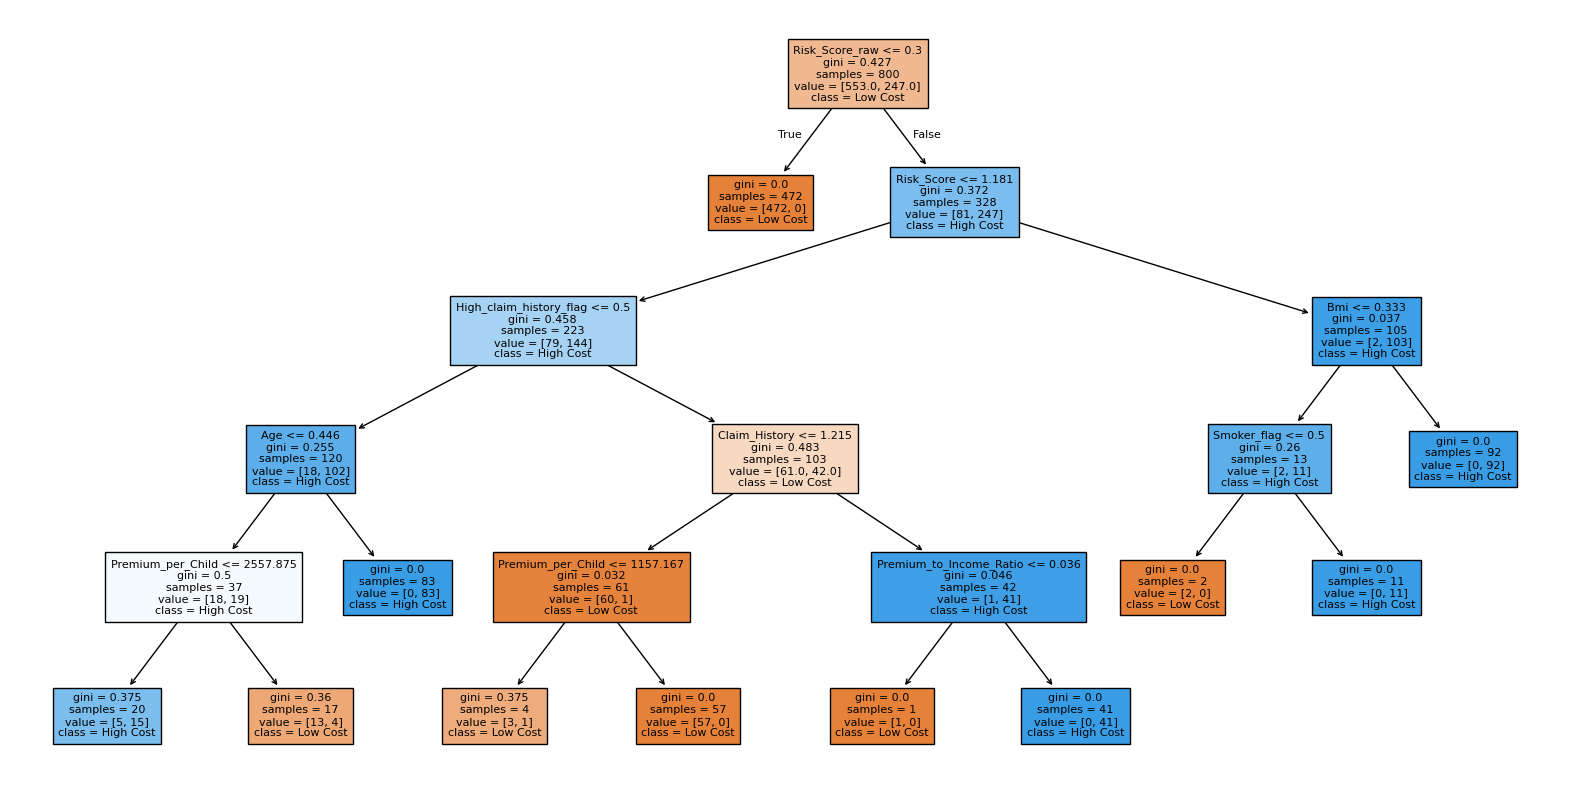

In [6]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df.drop(columns=['High_Cost_Claim', 'Customerid'])
y = df['High_Cost_Claim']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Initialize Decision Tree
dt_clf = DecisionTreeClassifier(
    criterion="gini",   # or "entropy"
    max_depth=5,        # limit depth to avoid overfitting
    random_state=42
)

# Train model
dt_clf.fit(X_train, y_train)

# Predict
y_pred_dt = dt_clf.predict(X_test)

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\n🔲 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Optional: Visualize the tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_clf, feature_names=X.columns, class_names=["Low Cost", "High Cost"], filled=True, fontsize=8)
plt.show()
